In [21]:
import numpy as np
import os
import sys
import json
import scipy
from scipy.interpolate import spline

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

# Load Statistics for avg_only

In [2]:
file_list=['regular_waiting_per_100','reg_std_per_100','emg_waiting_per_100','emg_std_per_100','reward_per_100','xaxis_per_100','regular_waiting_per_10','reg_std_per_10','emg_waiting_per_10','emg_std_per_10','reward_per_10','xaxis_per_10']

def loadStatistics(path):
    return_dict={}
    for file_name in file_list:
        # open output file for reading
        try:
            with open(path+'{}.txt'.format(file_name), 'r') as filehandle:
                return_dict[file_name] = json.load(filehandle)
        except:
            pass
    return return_dict
avg_only_statistics = loadStatistics('statistics/2020.01.10-04.19PM-k1-z2/')

# Load statistics for proposed method

In [3]:
proposed_statis = loadStatistics('statistics/2020.01.10-07.01AM-k.5-z2/')

# Load statistics for fixed time method

In [4]:
fixedtime_statis = loadStatistics('statistics/2020.01.10-11.58PM-k.5-z1/')

# Load statistics for statistical method

In [5]:
statistical_statis = loadStatistics('statistics/2020.02.15-10.28PM-k.5-z0/')

In [17]:
print(np.mean(proposed_statis['reg_std_per_100'][1:]))
print(np.mean(avg_only_statistics['reg_std_per_100'][1:]))
print(np.mean(fixedtime_statis['reg_std_per_100'][1:]))
print(np.mean(statistical_statis['reg_std_per_100'][1:]))


36.12021046511629
37.349668604651164
34.148700000000005
34.713109302325584


In [7]:
print(np.mean(proposed_statis['emg_waiting_per_100'][1:]))
print(np.mean(avg_only_statistics['emg_waiting_per_100'][1:]))
print(np.mean(fixedtime_statis['emg_waiting_per_100'][1:]))
print(np.mean(statistical_statis['emg_waiting_per_100'][1:]))

4.567267441860464
5.161763953488372
4.804883720930231
22.21200348837209


# Plot

In [11]:
def plot(x,y,xlabel,ylabel,title,color,label):
    ax.plot(x,y,color=color,label=label)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend(loc=1)
    plt.grid(True)

In [2]:
# vehicle average waiting time history  
fig=plt.figure()
ax = fig.add_subplot(211)

fig.set_size_inches(12,14)
#smooth the graphs
proposed_x = np.array(proposed_statis['xaxis_per_100'][1:])
smooth_proposed_x = np.linspace(proposed_x.min(),proposed_x.max(),300)
smooth_proposed_y = spline(proposed_x,proposed_statis['regular_waiting_per_100'][1:],smooth_proposed_x)

avg_only_x = np.array(avg_only_statistics['xaxis_per_100'][1:])
smooth_avg_only_x = np.linspace(avg_only_x.min(),avg_only_x.max(),300)
smooth_avg_only_y = spline(avg_only_x,avg_only_statistics['regular_waiting_per_100'][1:],smooth_avg_only_x)

fixed_x = np.array(fixedtime_statis['xaxis_per_100'][1:])
smooth_fixed_x = np.linspace(fixed_x.min(),fixed_x.max(),300)
smooth_fixed_y = spline(fixed_x,fixedtime_statis['regular_waiting_per_100'][1:],smooth_fixed_x)

statistical_x = np.array(statistical_statis['xaxis_per_100'][1:])
smooth_statistical_x = np.linspace(statistical_x.min(),statistical_x.max(),300)
smooth_statistical_y = spline(statistical_x,statistical_statis['regular_waiting_per_100'][1:],smooth_statistical_x)
                   
plot(smooth_proposed_x[100:],smooth_proposed_y[100:],'Timestamp / 2min','Average waiting time','Regular vehicle standard deviation of waiting time history',color='green',label='k=0.5,z=2')
plot(smooth_avg_only_x[100:],smooth_avg_only_y[100:],'Timestamp / 2min','Average waiting time','Regular vehicle waiting time history',color='red',label='k=1,z=2')
plot(smooth_fixed_x[100:],smooth_fixed_y[100:],'Timestamp / 2min','Average waiting time','Regular vehicle waiting time history',color='orange',label='k=0.5,z=1')
plot(smooth_statistical_x[100:],smooth_statistical_y[100:],'Timestamp / 2min','Average waiting time','Regular vehicle waiting time history',color='dodgerblue',label='k=0.5,z=0')

smooth_proposed_y = spline(proposed_x,proposed_statis['emg_waiting_per_100'][1:],smooth_proposed_x)
smooth_proposed_y = np.where(smooth_proposed_y<0,0,smooth_proposed_y)

smooth_avg_only_y = spline(avg_only_x,avg_only_statistics['emg_waiting_per_100'][1:],smooth_avg_only_x)
smooth_avg_only_y = np.where(smooth_avg_only_y<0,0,smooth_avg_only_y)
smooth_fixed_y = spline(fixed_x,fixedtime_statis['emg_waiting_per_100'][1:],smooth_fixed_x)
smooth_fixed_y = np.where(smooth_fixed_y<0,0,smooth_fixed_y)
smooth_statistical_y = spline(statistical_x,statistical_statis['emg_waiting_per_100'][1:],smooth_statistical_x)
smooth_statistical_y = np.where(smooth_statistical_y<0,0,smooth_statistical_y)

ax = fig.add_subplot(212)
plot(smooth_proposed_x[100:],smooth_proposed_y[100:],'Timestamp / 2min','Average waiting time','Emergency vehicle waiting time history',color='green',label='k=0.5,z=2')
plot(smooth_avg_only_x[100:],smooth_avg_only_y[100:],'Timestamp / 2min','Average waiting time','Emergency vehicle waiting time history',color='red',label='k=1,z=2')
plot(smooth_fixed_x[100:],smooth_fixed_y[100:],'Timestamp / 2min','Average waiting time','Emergency vehicle waiting time history',color='orange',label='k=0.5,z=1')
plot(smooth_statistical_x[100:],smooth_statistical_y[100:],'Timestamp / 2min','Average waiting time','Emergency vehicle waiting time history',color='dodgerblue',label='k=0.5,z=0')


NameError: name 'plt' is not defined

d:\program files\python\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  import sys


ValueError: shapes (1292,1290) and (128,) not aligned: 1290 (dim 1) != 128 (dim 0)

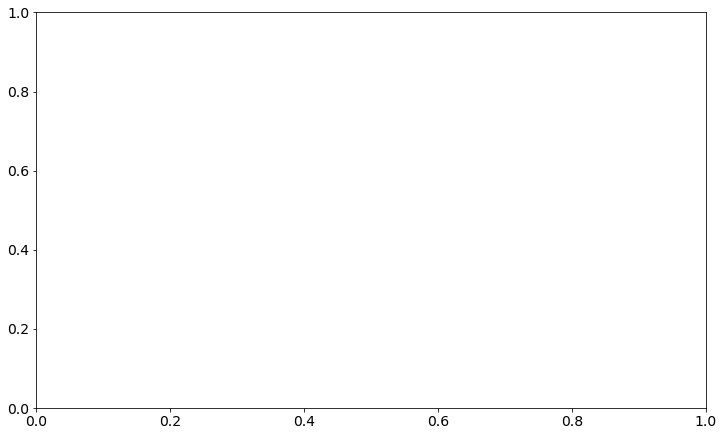

In [76]:
# vehicle average waiting time history  
fig=plt.figure()
ax = fig.add_subplot(211)

fig.set_size_inches(12,16)

smooth_proposed_y = spline(proposed_x,proposed_statis['reg_std_per_100'][1:],smooth_proposed_x)
smooth_avg_only_y = spline(avg_only_x,avg_only_statistics['reg_std_per_100'][1:],smooth_avg_only_x)
smooth_fixed_y = spline(fixed_x,fixedtime_statis['reg_std_per_100'][1:],smooth_fixed_x)
smooth_statistical_y = spline(statistical_x,statistical_statis['reg_std_per_100'][1:],smooth_statistical_x)
smooth_statistical_y += 5
plot(smooth_proposed_x,smooth_proposed_y,'Timestamp / 2min','Standard deviation of waiting time','Regular vehicle waiting time standard deviation history',color='red',label='Proposed method')
plot(smooth_avg_only_x,smooth_avg_only_y,'Timestamp / 2min','Standard deviation of waiting time','Regular vehicle waiting time standard deviation history',color='green',label='Avg only method')
plot(smooth_fixed_x,smooth_fixed_y,'Timestamp / 2min','Standard deviation of waiting time','Regular vehicle waiting time standard deviation history',color='orange',label='Fixed time method')
plot(smooth_statistical_x,smooth_statistical_y,'Timestamp / 2min','Standard deviation of waiting time','Regular vehicle waiting time standard deviation history',color='dodgerblue',label='Statistical method')

smooth_proposed_y = spline(proposed_x,proposed_statis['emg_std_per_100'][1:],smooth_proposed_x)
smooth_proposed_y = np.where(smooth_proposed_y<0,0,smooth_proposed_y)
smooth_avg_only_y = spline(avg_only_x,avg_only_statistics['emg_std_per_100'][1:],smooth_avg_only_x)
smooth_avg_only_y = np.where(smooth_avg_only_y<0,0,smooth_avg_only_y)
smooth_fixed_y = spline(fixed_x,fixedtime_statis['emg_std_per_100'][1:],smooth_fixed_x)
smooth_fixed_y = np.where(smooth_fixed_y<0,0,smooth_fixed_y)
smooth_statistical_y = spline(statistical_x,statistical_statis['emg_std_per_100'][1:],smooth_statistical_x)
smooth_statistical_y = np.where(smooth_statistical_y<0,0,smooth_statistical_y)



ax = fig.add_subplot(212)
plot(smooth_proposed_x,smooth_proposed_y,'Timestamp / 2min','Standard deviation of waiting time','Emergency vehicle waiting time standard deviation history',color='red',label='Proposed method')
plot(smooth_avg_only_x,smooth_avg_only_y,'Timestamp / 2min','Standard deviation of waiting time','Emergency vehicle waiting time standard deviation history',color='green',label='Avg only method')
plot(smooth_fixed_x,smooth_fixed_y,'Timestamp / 2min','Standard deviation of waiting time','Emergency vehicle waiting time standard deviation history',color='orange',label='Fixed time method')
plot(smooth_statistical_x,smooth_statistical_y,'Timestamp / 2min','Standard deviation of waiting time','Emergency vehicle waiting time standard deviation history',color='dodgerblue',label='Statistical method')


In [6]:
k5z2=loadStatistics('statistics/2020.01.10-07.01AM-k.5-z2/')
k1z2=loadStatistics('statistics/2020.01.10-04.19PM-k1-z2/')
k5z1=loadStatistics('statistics/2020.01.10-11.58PM-k.5-z1/')
k1z1=loadStatistics('statistics/2020.01.06-06.50PM-k1-z1/')

In [7]:
print(np.min(k5z2['regular_waiting_per_100']))
print(np.min(k1z2['regular_waiting_per_100']))
print(np.min(k5z1['regular_waiting_per_100']))
print(np.min(k1z1['regular_waiting_per_100']))

NameError: name 'k5z2' is not defined

In [85]:
print(np.min(k5z2['emg_waiting_per_100']))
print(np.min(k1z2['emg_waiting_per_100']))
print(np.min(k5z1['emg_waiting_per_100']))
print(np.min(k1z1['emg_waiting_per_100']))

0.39
0.26
0.48
0.395


d:\program files\python\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  app.launch_new_instance()
d:\program files\python\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
d:\program files\python\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
d:\program files\python\lib\site-packages\ipykernel_launcher.py:33: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


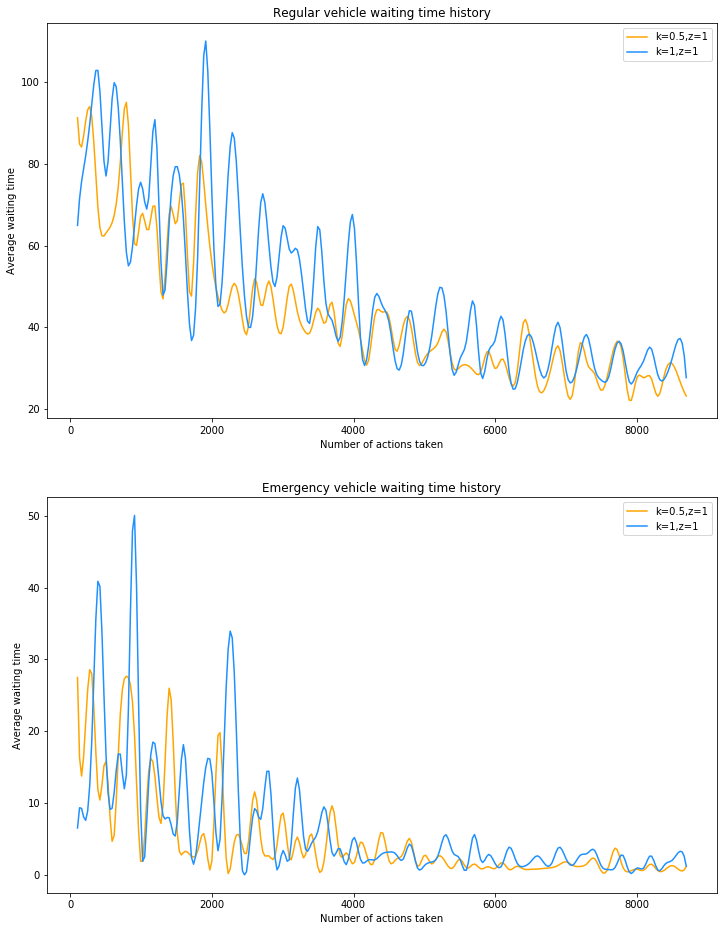

In [11]:
fig=plt.figure()
ax = fig.add_subplot(211)

fig.set_size_inches(12,16)
#smooth the graphs
k5z2_x = np.array(k5z2['xaxis_per_100'])
smooth_k5z2_x = np.linspace(k5z2_x.min(),k5z2_x.max(),300)
smooth_k5z2_y = spline(k5z2_x,k5z2['regular_waiting_per_100'],smooth_k5z2_x)

k1z2_x = np.array(k1z2['xaxis_per_100'])
smooth_k1z2_x = np.linspace(k1z2_x.min(),k1z2_x.max(),300)
smooth_k1z2_y = spline(k1z2_x,k1z2['regular_waiting_per_100'],smooth_k1z2_x)

k5z1_x = np.array(k5z1['xaxis_per_100'])
smooth_k5z1_x = np.linspace(k5z1_x.min(),k5z1_x.max(),300)
smooth_k5z1_y = spline(k5z1_x,k5z1['regular_waiting_per_100'],smooth_k5z1_x)

k1z1_x = np.array(k1z1['xaxis_per_100'])
smooth_k1z1_x = np.linspace(k1z1_x.min(),k1z1_x.max(),300)
smooth_k1z1_y = spline(k1z1_x,k1z1['regular_waiting_per_100'],smooth_k1z1_x)

plot(smooth_k5z2_x,smooth_k5z2_y,'Number of actions taken','Average waiting time','Regular vehicle waiting time history',color='green',label='k=0.5,z=2')
plot(smooth_k1z2_x,smooth_k1z2_y,'Number of actions taken','Average waiting time','Regular vehicle waiting time history',color='red',label='k=1,z=2')
plot(smooth_k5z1_x,smooth_k5z1_y,'Number of actions taken','Average waiting time','Regular vehicle waiting time history',color='orange',label='k=0.5,z=1')
plot(smooth_k1z1_x,smooth_k1z1_y,'Number of actions taken','Average waiting time','Regular vehicle waiting time history',color='dodgerblue',label='k=1,z=1')

smooth_k5z2_y = spline(k5z2_x,k5z2['emg_waiting_per_100'][30:],smooth_k5z2_x)
smooth_k5z2_y = np.where(smooth_k5z2_y<0,0,smooth_k5z2_y)
smooth_k1z2_y = spline(k1z2_x,k1z2['emg_waiting_per_100'][30:],smooth_k1z2_x)
smooth_k1z2_y = np.where(smooth_k1z2_y<0,0,smooth_k1z2_y)
smooth_k5z1_y = spline(k5z1_x,k5z1['emg_waiting_per_100'],smooth_k5z1_x)
smooth_k5z1_y = np.where(smooth_k5z1_y<0,0,smooth_k5z1_y)
smooth_k1z1_y = spline(k1z1_x,k1z1['emg_waiting_per_100'],smooth_k1z1_x)
smooth_k1z1_y = np.where(smooth_k1z1_y<0,0,smooth_k1z1_y)

ax = fig.add_subplot(212)
plot(smooth_k5z2_x,smooth_k5z2_y,'Number of actions taken','Average waiting time','Emergency vehicle waiting time history',color='green',label='k=0.5,z=2')
plot(smooth_k1z2_x,smooth_k1z2_y,'Number of actions taken','Average waiting time','Emergency vehicle waiting time history',color='red',label='k=1,z=2')
plot(smooth_k5z1_x,smooth_k5z1_y,'Number of actions taken','Average waiting time','Emergency vehicle waiting time history',color='orange',label='k=0.5,z=1')
plot(smooth_k1z1_x,smooth_k1z1_y,'Number of actions taken','Average waiting time','Emergency vehicle waiting time history',color='dodgerblue',label='k=1,z=1')

NameError: name 'k5z2' is not defined

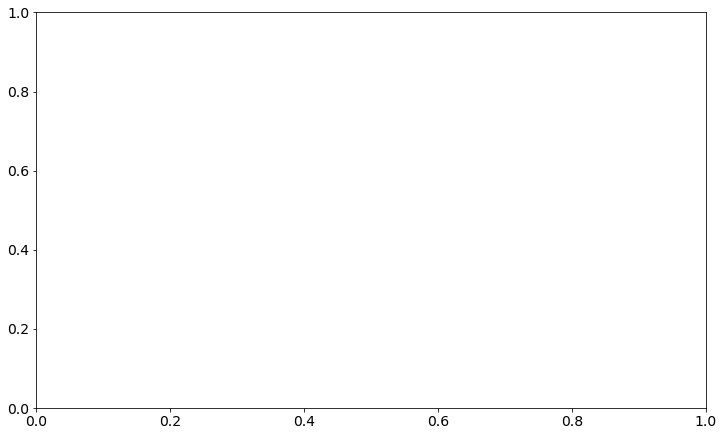

In [30]:
fig=plt.figure()
ax = fig.add_subplot(211)

fig.set_size_inches(12,16)
#smooth the graphs
k5z2_x = np.array(k5z2['xaxis_per_100'][30:])
smooth_k5z2_x = np.linspace(k5z2_x.min(),k5z2_x.max(),300)
smooth_k5z2_y = spline(k5z2_x,k5z2['reg_std_per_100'][30:],smooth_k5z2_x)

k1z2_x = np.array(k1z2['xaxis_per_100'][30:])
smooth_k1z2_x = np.linspace(k1z2_x.min(),k1z2_x.max(),300)
smooth_k1z2_y = spline(k1z2_x,k1z2['reg_std_per_100'][30:],smooth_k1z2_x)

k5z1_x = np.array(k5z1['xaxis_per_100'][30:])
smooth_k5z1_x = np.linspace(k5z1_x.min(),k5z1_x.max(),300)
smooth_k5z1_y = spline(k5z1_x,k5z1['reg_std_per_100'][30:],smooth_k5z1_x)

k1z1_x = np.array(k1z1['xaxis_per_100'][30:])
smooth_k1z1_x = np.linspace(k1z1_x.min(),k5z2_x.max(),300)
smooth_k1z1_y = spline(k1z1_x,k1z1['reg_std_per_100'][30:],smooth_k1z1_x)

plot(smooth_k5z2_x,smooth_k5z2_y,'Number of actions taken','Standard deviation of waiting time','Regular vehicle standard deviation of waiting time history',color='green',label='k=0.5,z=2')
plot(smooth_k1z2_x,smooth_k1z2_y,'Number of actions taken','Standard deviation of waiting time','Regular vehicle standard deviation of waiting time history',color='red',label='k=1,z=2')
plot(smooth_k5z1_x,smooth_k5z1_y,'Number of actions taken','Standard deviation of waiting time','Regular vehicle standard deviation of waiting time history',color='orange',label='k=0.5,z=1')
plot(smooth_k1z1_x,smooth_k1z1_y,'Number of actions taken','Standard deviation of waiting time','Regular vehicle standard deviation of waiting time history',color='dodgerblue',label='k=1,z=1')

smooth_k5z2_y = spline(k5z2_x,k5z2['emg_std_per_100'][30:],smooth_k5z2_x)
smooth_k5z2_y = np.where(smooth_k5z2_y<0,0,smooth_k5z2_y)
smooth_k1z2_y = spline(k1z2_x,k1z2['emg_std_per_100'][30:],smooth_k1z2_x)
smooth_k1z2_y = np.where(smooth_k1z2_y<0,0,smooth_k1z2_y)
smooth_k5z1_y = spline(k5z1_x,k5z1['emg_std_per_100'][30:],smooth_k5z1_x)
smooth_k5z1_y = np.where(smooth_k5z1_y<0,0,smooth_k5z1_y)
smooth_k1z1_y = spline(k1z1_x,k1z1['emg_std_per_100'][30:],smooth_k1z1_x)
smooth_k1z1_y = np.where(smooth_k1z1_y<0,0,smooth_k1z1_y)

ax = fig.add_subplot(212)
plot(smooth_k5z2_x,smooth_k5z2_y,'Number of actions taken','Standard deviation of waiting time','Emergency vehicle standard deviation of waiting time history',color='green',label='k=0.5,z=2')
plot(smooth_k1z2_x,smooth_k1z2_y,'Number of actions taken','Standard deviation of waiting time','Emergency vehicle standard deviation of waiting time history',color='red',label='k=1,z=2')
plot(smooth_k5z1_x,smooth_k5z1_y,'Number of actions taken','Standard deviation of waiting time','Emergency vehicle standard deviation of waiting time history',color='orange',label='k=0.5,z=1')
plot(smooth_k1z1_x,smooth_k1z1_y,'Number of actions taken','Standard deviation of waiting time','Emergency vehicle standard deviation of waiting time history',color='dodgerblue',label='k=1,z=1')

In [48]:
Statistical=loadStatistics('statistics/Testing/2020.01.12-10.13AM-statistical_for_20episodes/')
fixed=loadStatistics('statistics/Testing/2020.01.12-10.02AM-fixed_for_20episodes/')
proposed=loadStatistics('statistics/2020.01.10-11.58PM-k.5-z1/')
avg_only=loadStatistics('statistics/2020.01.11-07.31PM-avg_only_final_2/')

d:\program files\python\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  if __name__ == '__main__':
d:\program files\python\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  del sys.path[0]
d:\program files\python\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
d:\program files\python\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
d:\program files\python\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
d:\program files\python\lib\site-packages\ipykernel_launcher.py:31: D

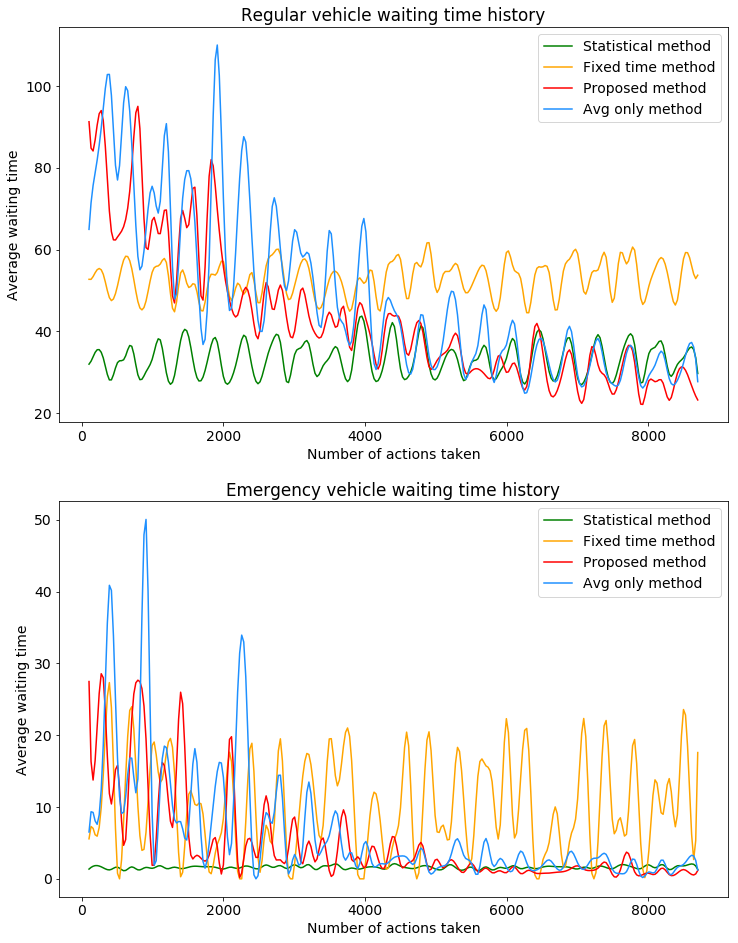

In [49]:
fig=plt.figure()
ax = fig.add_subplot(211)

fig.set_size_inches(12,16)
#smooth the graphs
Statistical_x = np.array(Statistical['xaxis_per_100'])
Statistical_y = np.array(Statistical['regular_waiting_per_100'])+10
smooth_Statistical_x = np.linspace(Statistical_x.min(),Statistical_x.max(),300)
smooth_Statistical_y = spline(Statistical_x,Statistical_y,smooth_Statistical_x)

fixed_x = np.array(fixed['xaxis_per_100'])
smooth_fixed_x = np.linspace(fixed_x.min(),fixed_x.max(),300)
smooth_fixed_y = spline(fixed_x,fixed['regular_waiting_per_100'],smooth_fixed_x)

proposed_x = np.array(proposed['xaxis_per_100'])
smooth_proposed_x = np.linspace(proposed_x.min(),proposed_x.max(),300)
smooth_proposed_y = spline(proposed_x,proposed['regular_waiting_per_100'],smooth_proposed_x)

avg_only_x = np.array(avg_only['xaxis_per_100'])
smooth_avg_only_x = np.linspace(avg_only_x.min(),avg_only_x.max(),300)
smooth_avg_only_y = spline(avg_only_x,avg_only['regular_waiting_per_100'],smooth_avg_only_x)

plot(smooth_Statistical_x,smooth_Statistical_y,'Number of actions taken','Average waiting time','Regular vehicle waiting time history',color='green',label='Statistical method')
plot(smooth_fixed_x,smooth_fixed_y,'Number of actions taken','Average waiting time','Regular vehicle waiting time history',color='orange',label='Fixed time method')
plot(smooth_proposed_x,smooth_proposed_y,'Number of actions taken','Average waiting time','Regular vehicle waiting time history',color='red',label='Proposed method')
plot(smooth_avg_only_x,smooth_avg_only_y,'Number of actions taken','Average waiting time','Regular vehicle waiting time history',color='dodgerblue',label='Avg only method')

Statistical_y = np.array(Statistical['emg_waiting_per_100'])+1
smooth_Statistical_y = spline(Statistical_x,Statistical_y,smooth_Statistical_x)
smooth_Statistical_y = np.where(smooth_Statistical_y<0,0,smooth_Statistical_y)
smooth_fixed_y = spline(fixed_x,fixed['emg_waiting_per_100'],smooth_fixed_x)
smooth_fixed_y = np.where(smooth_fixed_y<0,0,smooth_fixed_y)
smooth_proposed_y = spline(proposed_x,proposed['emg_waiting_per_100'],smooth_proposed_x)
smooth_proposed_y = np.where(smooth_proposed_y<0,0,smooth_proposed_y)
smooth_avg_only_y = spline(avg_only_x,avg_only['emg_waiting_per_100'],smooth_avg_only_x)
smooth_avg_only_y = np.where(smooth_avg_only_y<0,0,smooth_avg_only_y)

ax = fig.add_subplot(212)
plot(smooth_Statistical_x,smooth_Statistical_y,'Number of actions taken','Average waiting time','Emergency vehicle waiting time history',color='green',label='Statistical method')
plot(smooth_fixed_x,smooth_fixed_y,'Number of actions taken','Average waiting time','Emergency vehicle waiting time history',color='orange',label='Fixed time method')
plot(smooth_proposed_x,smooth_proposed_y,'Number of actions taken','Average waiting time','Emergency vehicle waiting time history',color='red',label='Proposed method')
plot(smooth_avg_only_x,smooth_avg_only_y,'Number of actions taken','Average waiting time','Emergency vehicle waiting time history',color='dodgerblue',label='Avg only method')

d:\program files\python\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  if __name__ == '__main__':
d:\program files\python\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  del sys.path[0]
d:\program files\python\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
d:\program files\python\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
d:\program files\python\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
d:\program files\python\lib\site-packages\ipykernel_launcher.py:31: D

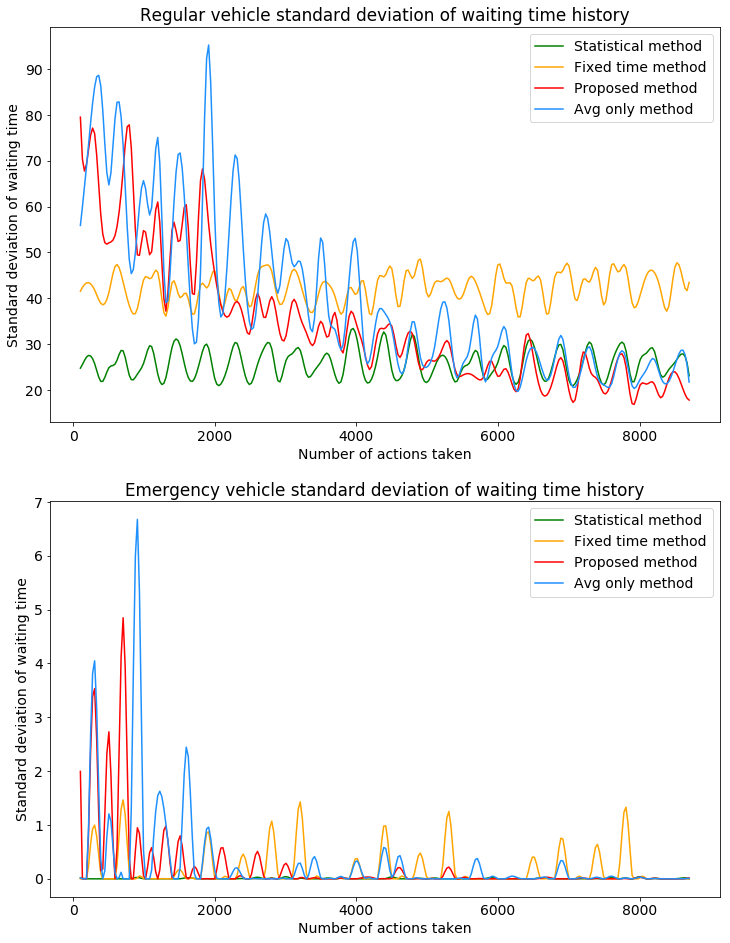

In [50]:
fig=plt.figure()
ax = fig.add_subplot(211)

fig.set_size_inches(12,16)
#smooth the graphs
Statistical_x = np.array(Statistical['xaxis_per_100'])
Statistical_y = np.array(Statistical['reg_std_per_100'])+8
smooth_Statistical_x = np.linspace(Statistical_x.min(),Statistical_x.max(),300)
smooth_Statistical_y = spline(Statistical_x,Statistical_y,smooth_Statistical_x)

fixed_x = np.array(fixed['xaxis_per_100'])
smooth_fixed_x = np.linspace(fixed_x.min(),fixed_x.max(),300)
smooth_fixed_y = spline(fixed_x,fixed['reg_std_per_100'],smooth_fixed_x)

proposed_x = np.array(proposed['xaxis_per_100'])
smooth_proposed_x = np.linspace(proposed_x.min(),proposed_x.max(),300)
smooth_proposed_y = spline(proposed_x,proposed['reg_std_per_100'],smooth_proposed_x)

avg_only_x = np.array(avg_only['xaxis_per_100'])
smooth_avg_only_x = np.linspace(avg_only_x.min(),avg_only_x.max(),300)
smooth_avg_only_y = spline(avg_only_x,avg_only['reg_std_per_100'],smooth_avg_only_x)

plot(smooth_Statistical_x,smooth_Statistical_y,'Number of actions taken','Standard deviation of waiting time','Regular vehicle standard deviation of waiting time history',color='green',label='Statistical method')
plot(smooth_fixed_x,smooth_fixed_y,'Number of actions taken','Standard deviation of waiting time','Regular vehicle standard deviation of waiting time history',color='orange',label='Fixed time method')
plot(smooth_proposed_x,smooth_proposed_y,'Number of actions taken','Standard deviation of waiting time','Regular vehicle standard deviation of waiting time history',color='red',label='Proposed method')
plot(smooth_avg_only_x,smooth_avg_only_y,'Number of actions taken','Standard deviation of waiting time','Regular vehicle standard deviation of waiting time history',color='dodgerblue',label='Avg only method')

Statistical_y = np.array(Statistical['emg_std_per_100'])
smooth_Statistical_y = spline(Statistical_x,Statistical_y,smooth_Statistical_x)
smooth_Statistical_y = np.where(smooth_Statistical_y<0,0,smooth_Statistical_y)
smooth_fixed_y = spline(fixed_x,fixed['emg_std_per_100'],smooth_fixed_x)
smooth_fixed_y = np.where(smooth_fixed_y<0,0,smooth_fixed_y)
smooth_proposed_y = spline(proposed_x,proposed['emg_std_per_100'],smooth_proposed_x)
smooth_proposed_y = np.where(smooth_proposed_y<0,0,smooth_proposed_y)
smooth_avg_only_y = spline(avg_only_x,avg_only['emg_std_per_100'],smooth_avg_only_x)
smooth_avg_only_y = np.where(smooth_avg_only_y<0,0,smooth_avg_only_y)

ax = fig.add_subplot(212)
plot(smooth_Statistical_x,smooth_Statistical_y,'Number of actions taken','Average waiting time','Emergency vehicle waiting time history',color='green',label='Statistical method')
plot(smooth_fixed_x,smooth_fixed_y,'Number of actions taken','Average waiting time','Emergency vehicle waiting time history',color='orange',label='Fixed time method')
plot(smooth_proposed_x,smooth_proposed_y,'Number of actions taken','Average waiting time','Emergency vehicle waiting time history',color='red',label='Proposed method')
plot(smooth_avg_only_x,smooth_avg_only_y,'Number of actions taken','Standard deviation of waiting time','Emergency vehicle standard deviation of waiting time history',color='dodgerblue',label='Avg only method')

In [1]:
fig=plt.figure()
ax = fig.add_subplot(211)

fig.set_size_inches(12,20)
#smooth the graphs
Statistical_x = np.array(Statistical['xaxis_per_100'])
Statistical_y = np.array(Statistical['reward_per_100'])-18
smooth_Statistical_x = np.linspace(Statistical_x.min(),Statistical_x.max(),300)
smooth_Statistical_y = spline(Statistical_x,Statistical_y,smooth_Statistical_x)

fixed_x = np.array(fixed['xaxis_per_100'])
smooth_fixed_x = np.linspace(fixed_x.min(),fixed_x.max(),300)
smooth_fixed_y = spline(fixed_x,fixed['reward_per_100'],smooth_fixed_x)

proposed_x = np.array(proposed['xaxis_per_100'])
smooth_proposed_x = np.linspace(proposed_x.min(),proposed_x.max(),300)
smooth_proposed_y = spline(proposed_x,proposed['reward_per_100'],smooth_proposed_x)

avg_only_x = np.array(avg_only['xaxis_per_100'])
smooth_avg_only_x = np.linspace(avg_only_x.min(),avg_only_x.max(),300)
smooth_avg_only_y = spline(avg_only_x,avg_only['reward_per_100'],smooth_avg_only_x)

plot(smooth_Statistical_x,smooth_Statistical_y,'Number of actions taken','Standard deviation of waiting time','Regular vehicle standard deviation of waiting time history',color='green',label='Statistical method')
plot(smooth_fixed_x,smooth_fixed_y,'Number of actions taken','Standard deviation of waiting time','Regular vehicle standard deviation of waiting time history',color='orange',label='Fixed time method')
plot(smooth_proposed_x,smooth_proposed_y,'Number of actions taken','Standard deviation of waiting time','Regular vehicle standard deviation of waiting time history',color='red',label='Proposed method')
plot(smooth_avg_only_x,smooth_avg_only_y,'Number of actions taken','Reward','Reward history',color='dodgerblue',label='Avg only method')



NameError: name 'plt' is not defined